### Welcome to the first practical workshop of the serie ! 

#### PACKAGES : 

Before starting your journey, you will need a couple of tools. Here is what you will need ! 

<ul>
    <li>Tensorflow</li>
    <li>Numpy</li>
    <li>matplotlib</li>
 </ul>

### Importing what we need 

In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt

### Downloading 

Let's now download the dataset we need in order to start working !

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


### Let's verify and display the data we have.

<strong>Look</strong>, we splitted our mnist dataet (all (image,label) couples) into 2 seperates sets.  <br> They are called training and testing set. 
We will train the model with the training set, and evaluate the model on the test set ! 


In [3]:
# accessing the shape of any numpy array with my_numpy_array.shape
print("x_train has shapes", x_train.shape) # a 60000 x 28 x 28 numpy array 

x_train has shapes (60000, 28, 28)


### Dimensions : 

### The first dimension, 60000, denotes the number of element 
### The second dimension, 28, and the third, 28, denote the height and the width of the images ! 

minimum value 0
maximum value 255


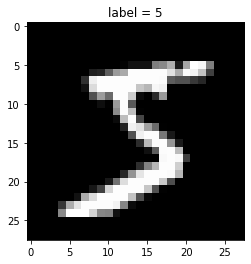

In [4]:
# selecting the first image of our dataset 

img = x_train[0]
print("minimum value", np.min(img))
print("maximum value", np.max(img))
# let's display the image
plt.imshow(img, cmap="gray") 
plt.title(f"label = {str(y_train[0])}") # the image's label
plt.show()

### Let's explore more images ! 

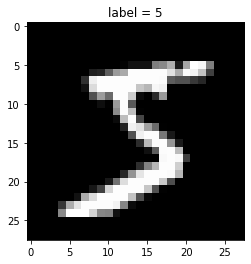

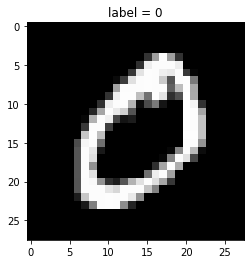

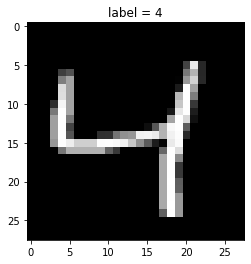

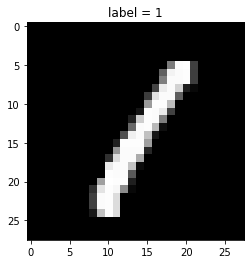

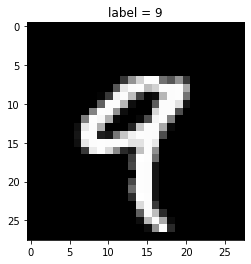

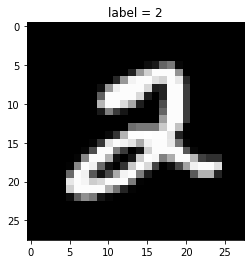

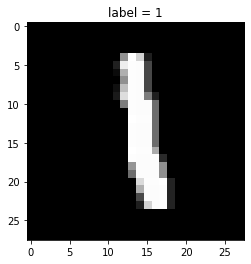

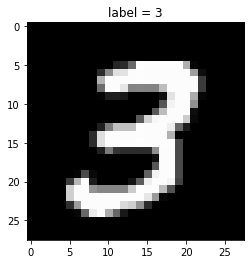

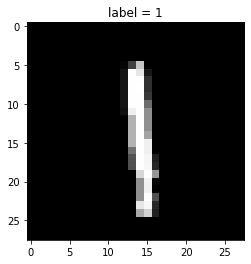

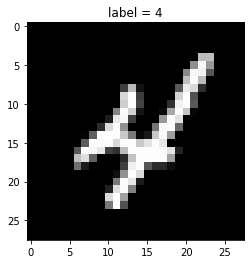

In [5]:
for i in range(10): 
    img = x_train[i]
    # let's display the image
    plt.imshow(img, cmap="gray") 
    plt.title(f"label = {str(y_train[i])}") # the image's label
    plt.show()

### our images have the following dimensions : (28,28). If you remember, we want does image to be reshaped, as a vector of size (28*28,) ! 


In [6]:

x_train = np.reshape(x_train, newshape=[x_train.shape[0], -1]) 
x_test = np.reshape(x_test, newshape=[x_test.shape[0], -1])

x_train = x_train / 255.0 # makes the computation easier
x_test = x_test / 255.0 # makes the computation easier 

In [7]:
# let's check the shape of our datasets
print("x_train new shapes", x_train.shape) 
print("x_test new shapes", x_test.shape)


x_train new shapes (60000, 784)
x_test new shapes (10000, 784)


#### At this point, we are done with shaping the input of our neural network and we replicated this process : 
<img src="img/input.gif" style="width:600px;height:300px;">

## Encoding the labels in order to train our model ! ONE HOT ENCODING ! 

#### one hot encoding is a very simple principle that does this : 


<img src="img/one_hot.jpg" style="width:600px;height:300px;">

In [8]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#### Our labels now look like this : 

In [9]:
print(y_train[:10]) # only displaying the first 10 labels
print("new y_train shape", y_train.shape) 
print("new y_test shape", y_test.shape)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
new y_train shape (60000, 10)
new y_test shape (10000, 10)


### We are ready to build our model ! 

But first, let's do a quick summary of what we have done so far. 
We : 

<ul>
    <li>Downloaded the dataset using keras</li>
    <li>Added one dimension because keras only takes 3D images</li>
    <li>We used one hot encoding in order to encode our labels </li>
</ul>

### Option 1 : Using the sequential module !

The <strong>tf.keras.sequential</strong> module, allows us to simply mention all the layers and units we need in our neural network ! 

In [10]:
input_shape = x_train.shape[1:]

In [11]:
# creating a neural network
my_dnn = tf.keras.Sequential([
    # the entry point is our input ! We need to specify the shape of this input 
    tf.keras.Input(shape=input_shape),
    # We can now add our layers ! 
    tf.keras.layers.Dense(16), 
    tf.keras.layers.Dense(16), 
    tf.keras.layers.Dense(10)
])

2021-11-28 12:10:28.263600: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-28 12:10:28.269965: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-28 12:10:28.270571: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-28 12:10:28.271571: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

#### Let's make sure it is working ! my_model.summary() allows you to summarize all the informations of your model ! 
#### It is really useful when it comes to debugging your model ! 

In [12]:
my_dnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


#### At this point, our neural network looks like this  : 

<img src="img/nn.png" style="width:300px;height:300px;">

## Let's train the model ! 

#### To train the model, we will need to following informations : 


<ul>
    <li>The of iterations are neural network is going to perform before stopping</li>
    <li>The batch size : number of elements by epoch</li>
    <li>The learning rate : 0.01, 0.001, 0.0001, ... let's experiment ! 
</ul>

## These 3 elements are known as Hyper-Parameters ! We are not learning them (unlike weights), but we need to hard code them ! 

In [13]:
epochs = 10 
batch_size = 8 # 8 images each iteration
lr = 0.001 # learning rate

#### Let's tell our neural network that we want to use : 

<ul>
<li>loss : crossentropy loss</li>
<li>optimizer : an optimization algorithm the minimize our loss (here we will go with a vanilla gradient descent)</li> 
<li>the metric we are interested in </li> 
</ul>

In [14]:
# Calling comile in order to setup the training
optimizer = tf.keras.optimizers.SGD(
    learning_rate=lr, momentum=0.0
)
my_dnn.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

## It's training time !!! 

#### We need to tell keras about : 

<ul>
    <li>The images and labels we will use to train the neural network </li> 
    <li>The batch size</li> 
    <li>The number of epochs </li>
</ul>

In [15]:
history = my_dnn.fit(    
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs,
)

2021-11-28 12:10:29.848336: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
7500/7500 [==============================] - 16s 2ms/step - loss: 8.0891 - accuracy: 0.0986
Epoch 2/10
7500/7500 [==============================] - 15s 2ms/step - loss: 8.3201 - accuracy: 0.0987
Epoch 3/10
7500/7500 [==============================] - 15s 2ms/step - loss: 8.3524 - accuracy: 0.0987
Epoch 4/10
7500/7500 [==============================] - 15s 2ms/step - loss: 8.3524 - accuracy: 0.0987
Epoch 5/10
7500/7500 [==============================] - 15s 2ms/step - loss: 8.3524 - accuracy: 0.0987
Epoch 6/10
7500/7500 [==============================] - 15s 2ms/step - loss: 8.3524 - accuracy: 0.0987
Epoch 7/10
7500/7500 [==============================] - 15s 2ms/step - loss: 8.3524 - accuracy: 0.0987
Epoch 8/10
7500/7500 [==============================] - 15s 2ms/step - loss: 8.3524 - accuracy: 0.0987
Epoch 9/10
7500/7500 [==============================] - 15s 2ms/step - loss: 8.3524 - accuracy: 0.0987
Epoch 10/10
7500/7500 [==============================] - 15s 2ms/step - l

### Let's visualize the result of our training by accessing the model's history

In [16]:
def plot_results(history): 
    training_loss = history.history["loss"]
    training_accuracy = history.history["accuracy"] 

    fig, axs = plt.subplots(2, 1, figsize=(10,10))
    axs[0].set_title("training loss")
    axs[0].set_xlabel("epochs")
    axs[0].set_ylabel("loss")

    axs[1].set_title("training accuracy")
    axs[0].set_xlabel("accuracy")
    axs[0].set_ylabel("loss")
    axs[1].set_ylabel("accuracy")
    axs[0].plot(range(epochs), training_loss, "b")
    axs[1].plot(range(epochs), training_accuracy, "g")
    plt.show()

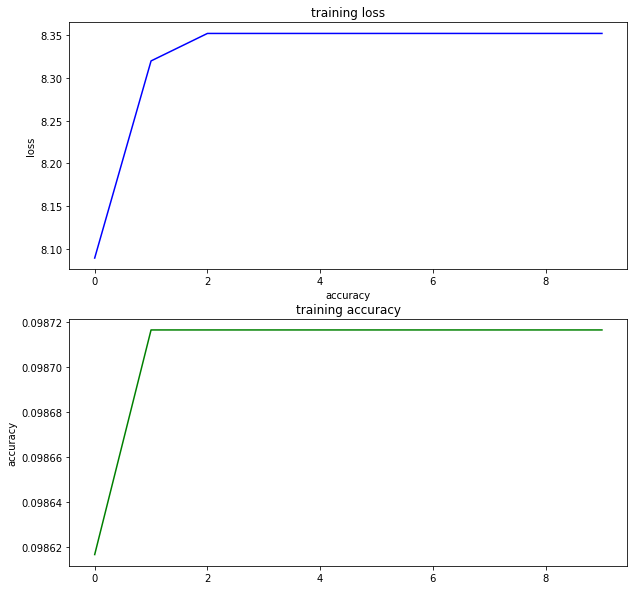

In [17]:
plot_results(history)

### Indeed, we didn't specify any activation functions ! 

#### We will use the ReLu and Softmax activation here, as we have a total of 10 classes 

#### Why using the ReLu activation ? 

<ul>
    <li> avoid vanishing gradient (i.e, preventing the weight from changing its value)</li>
    <li> not expensive to compute ( max(0,x) ) </li>
    
</ul>

but ... 

<ul>
    <li> tend to blow up activation (there is no mechanism to constrain the output of the neuron )</li>
    <li> if too many activations get below zero then most of the units(neurons) in network with Relu will simply output zero</li>
</ul>

#### Why using the softmax activation ( in the last layer of course ) ? 

<ul>
    <li>allows us to have values between [0,1]</li>
</ul>


In [18]:
# creating a neural network
my_dnn = tf.keras.Sequential([
    # the entry point is our input ! We need to specify the shape of this input 
    tf.keras.Input(shape=input_shape),
    # We can now add our layers ! 
    tf.keras.layers.Dense(16, activation="relu"), 
    tf.keras.layers.Dense(16, activation="relu"), 
    tf.keras.layers.Dense(10, activation="softmax")
])

In [19]:
my_dnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Calling comile in order to setup the training
optimizer = tf.keras.optimizers.SGD(
    learning_rate=lr, momentum=0.0
)
my_dnn.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [21]:
history = my_dnn.fit(    
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs
)

Epoch 1/10
7500/7500 [==============================] - 14s 2ms/step - loss: 0.4765 - accuracy: 0.8624
Epoch 2/10
7500/7500 [==============================] - 14s 2ms/step - loss: 0.2560 - accuracy: 0.9270
Epoch 3/10
7500/7500 [==============================] - 14s 2ms/step - loss: 0.2185 - accuracy: 0.9370
Epoch 4/10
7500/7500 [==============================] - 14s 2ms/step - loss: 0.1951 - accuracy: 0.9438
Epoch 5/10
7500/7500 [==============================] - 14s 2ms/step - loss: 0.1783 - accuracy: 0.9482
Epoch 6/10
7500/7500 [==============================] - 14s 2ms/step - loss: 0.1678 - accuracy: 0.9503
Epoch 7/10
7500/7500 [==============================] - 14s 2ms/step - loss: 0.1584 - accuracy: 0.9530
Epoch 8/10
7500/7500 [==============================] - 14s 2ms/step - loss: 0.1527 - accuracy: 0.9558
Epoch 9/10
7500/7500 [==============================] - 14s 2ms/step - loss: 0.1461 - accuracy: 0.9566
Epoch 10/10
7500/7500 [==============================] - 14s 2ms/step - l

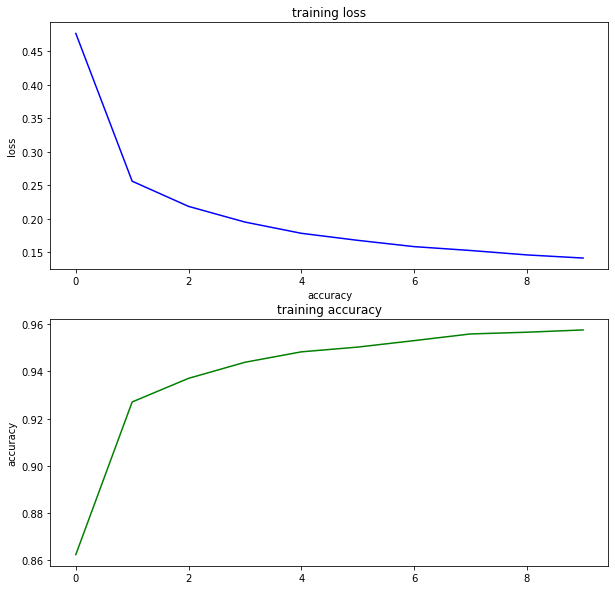

In [22]:
plot_results(history)

#### Let's increase the complexity of the model !

In [23]:
# creating a neural network
print(input_shape)
my_dnn = tf.keras.Sequential([
    # the entry point is our input ! We need to specify the shape of this input 
    tf.keras.Input(shape=input_shape),
    # We can now add our layers ! 
    tf.keras.layers.Dense(64, activation="relu"), 
    tf.keras.layers.Dense(32, activation="relu"), 
    tf.keras.layers.Dense(28, activation="relu"), 
    tf.keras.layers.Dense(10, activation="softmax")
])

(784,)


In [24]:
my_dnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 28)                924       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                290       
Total params: 53,534
Trainable params: 53,534
Non-trainable params: 0
_________________________________________________________________


In [25]:
optimizer = tf.keras.optimizers.SGD(
    learning_rate=lr
)
my_dnn.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [26]:
history = my_dnn.fit(    
    x=x_train,
    y=y_train,
    batch_size=batch_size,
    epochs=epochs
)

Epoch 1/10
7500/7500 [==============================] - 15s 2ms/step - loss: 0.4194 - accuracy: 0.8740
Epoch 2/10
7500/7500 [==============================] - 15s 2ms/step - loss: 0.1727 - accuracy: 0.9481
Epoch 3/10
7500/7500 [==============================] - 15s 2ms/step - loss: 0.1264 - accuracy: 0.9615
Epoch 4/10
7500/7500 [==============================] - 15s 2ms/step - loss: 0.1010 - accuracy: 0.9697
Epoch 5/10
7500/7500 [==============================] - 15s 2ms/step - loss: 0.0859 - accuracy: 0.9743
Epoch 6/10
7500/7500 [==============================] - 15s 2ms/step - loss: 0.0732 - accuracy: 0.9777
Epoch 7/10
7500/7500 [==============================] - 15s 2ms/step - loss: 0.0643 - accuracy: 0.9805
Epoch 8/10
7500/7500 [==============================] - 15s 2ms/step - loss: 0.0554 - accuracy: 0.9829
Epoch 9/10
7500/7500 [==============================] - 15s 2ms/step - loss: 0.0500 - accuracy: 0.9841
Epoch 10/10
7500/7500 [==============================] - 16s 2ms/step - l

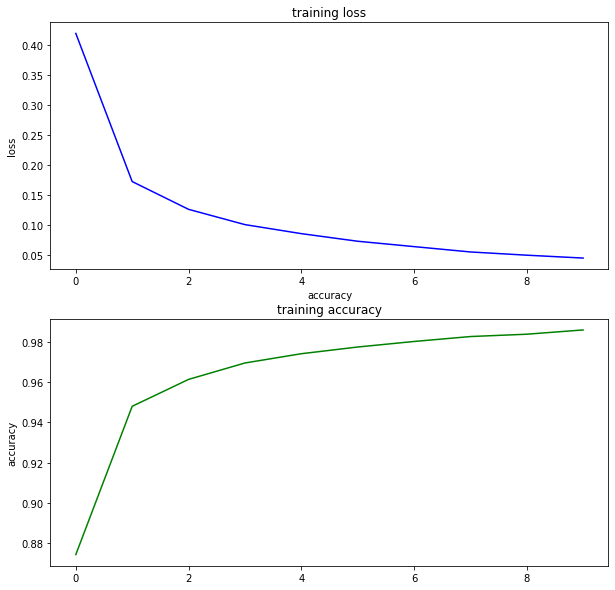

In [27]:
plot_results(history)

### We obtained 98.52 % accuracy on the training data ! 
### Let's try to run our model on data it has never seen before ! 

In [28]:
predictions = my_dnn.predict(x_test) 
print(predictions.shape)
print(predictions)

(10000, 10)
[[6.8356719e-08 2.4832327e-05 1.7224157e-07 ... 9.9997103e-01
  6.2226832e-07 1.0126067e-06]
 [5.5058416e-09 1.9894463e-03 9.9368179e-01 ... 5.7372375e-07
  7.0688152e-06 2.6742942e-13]
 [5.2308807e-10 9.9965084e-01 2.5397717e-06 ... 8.1216480e-05
  2.3553429e-04 1.9339150e-06]
 ...
 [7.2610151e-14 3.6282635e-10 2.3485821e-14 ... 7.3557248e-07
  1.8904231e-08 2.6406080e-04]
 [4.9342197e-09 2.6512842e-08 1.6766305e-16 ... 4.7253815e-11
  5.1358420e-06 1.5087785e-08]
 [1.6195568e-08 2.9581920e-13 6.0752231e-10 ... 6.2205918e-12
  1.3256151e-09 7.4266104e-15]]


In [29]:
def decode_predictions(one_hot_pred): 
    return np.argmax(one_hot_pred, axis=1)

preds = decode_predictions(predictions)
true_labels = decode_predictions(y_test)

In [30]:
def compute_accuracy(preds, true): 
    accuracy = np.where(preds == true, 1, 0).sum() / len(true)
    print(f"Accuracy : {accuracy}")

In [31]:
compute_accuracy(preds,true_labels)

Accuracy : 0.9606


In [32]:
def confusion_matrix(pred_labels, true_label): 
    M = np.zeros((10,10)) # we have 10 classes ! 
    
    for i in range(len(pred_labels)): 
        pred_value = pred_labels[i] 
        true_value = true_label[i] 
        M[int(pred_value), int(true_value)] += 1
        
    fig = plt.figure()
    ax = fig.add_subplot(111)

    M = ax.matshow(M)
    ax.set_yticklabels([f"pred {x}" for x in range(10)])
    ax.set_xticklabels([f"true {x}" for x in range(10)])
    fig.colorbar(M)
    return

/tmp/ipykernel_8179/1504362157.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"pred {x}" for x in range(10)])
/tmp/ipykernel_8179/1504362157.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"true {x}" for x in range(10)])


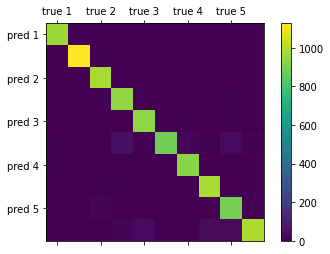

In [33]:
confusion_matrix(preds, true_labels)

#### Let's run inference on this model ! 
#### We need to save it first ! We then load the model again to make sure it was correctly saved

In [35]:
my_dnn.save("mnist_dnn.h5")
my_loaded_dnn = tf.keras.models.load_model("mnist_dnn.h5")

#### Let's load some pictures

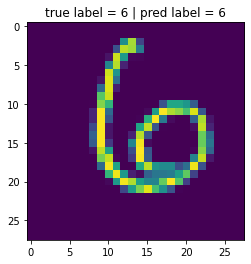

In [36]:
pred = my_loaded_dnn.predict(x=x_test[None,100])
true = y_test[100].argmax()
pred = decode_predictions(pred).squeeze()

plt.title(f"true label = {true} | pred label = {pred}")
plt.imshow(x_test[100].reshape(28,28))


### Let's run a couple of experimentations here : 

#### We will try different set of layers, different batch size and different learning rate !

Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_280 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_281 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_282 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_283 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_284 (Dense)            (None, 10)                170       
Total params: 111,514
Trainable params: 111,514
Non-trainable params: 0
_________________________________________________________________


2021-11-28 21:47:27.426093: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-28 21:47:27.426127: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-28 21:47:27.426182: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-11-28 21:47:27.426215: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 1/20
  68/3750 [..............................] - ETA: 11s - loss: 2.2614 - accuracy: 0.2086

2021-11-28 21:47:28.072138: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-28 21:47:28.072178: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-28 21:47:28.072295: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-11-28 21:47:28.093679: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-11-28 21:47:28.095006: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 0 callback api events and 0 activity events. 
2021-11-28 21:47:28.095940: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-28 21:47:28.097073: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/lr=0.01_bs=16_layers=[128, 64, 32, 16, 10

3750/3750 [==============================] - 9s 2ms/step - loss: 0.5321 - accuracy: 0.8405
Epoch 2/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.1916 - accuracy: 0.9437
Epoch 3/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.1370 - accuracy: 0.9603
Epoch 4/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.1080 - accuracy: 0.9679
Epoch 5/20
3750/3750 [==============================] - 9s 3ms/step - loss: 0.0893 - accuracy: 0.9731
Epoch 6/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.0740 - accuracy: 0.9778
Epoch 7/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.0623 - accuracy: 0.9809
Epoch 8/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.0538 - accuracy: 0.9830
Epoch 9/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.0470 - accuracy: 0.9855
Epoch 10/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.0393 - accurac

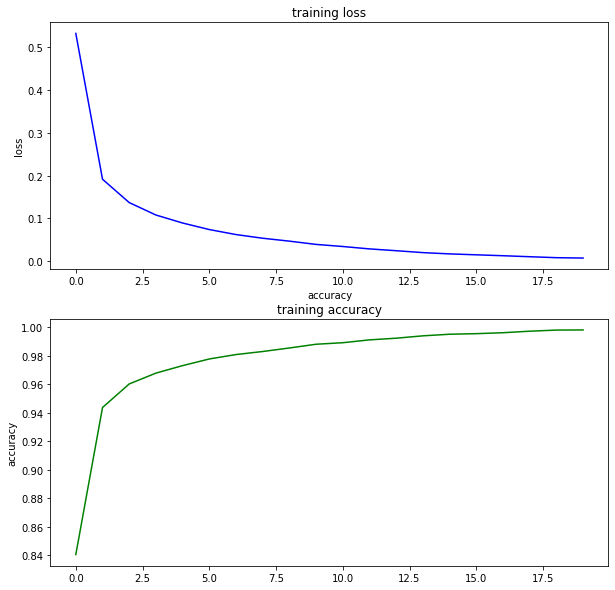

INFO:tensorflow:Assets written to: lr=0.01_bs=16_layers=[128, 64, 32, 16, 10]/assets
Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_285 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_286 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_287 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_288 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_289 (Dense)            (None, 10)                170       
Total params: 111,514
Trainable params: 111,514
Non-trainable params: 0
_________________________________________________________________


2021-11-28 21:50:27.570085: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-28 21:50:27.570121: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-28 21:50:27.570175: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-11-28 21:50:27.570232: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 1/20
  81/1875 [>.............................] - ETA: 4s - loss: 2.2860 - accuracy: 0.1277

2021-11-28 21:50:28.250071: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-28 21:50:28.250101: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-28 21:50:28.250200: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-11-28 21:50:28.264863: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-11-28 21:50:28.265509: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 0 callback api events and 0 activity events. 
2021-11-28 21:50:28.266001: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-28 21:50:28.266520: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/lr=0.01_bs=32_layers=[128, 64, 32, 16, 10

1875/1875 [==============================] - 5s 2ms/step - loss: 0.8735 - accuracy: 0.7163
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3004 - accuracy: 0.9138
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2113 - accuracy: 0.9386
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1644 - accuracy: 0.9517
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1366 - accuracy: 0.9596
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1166 - accuracy: 0.9656
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1027 - accuracy: 0.9698
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0902 - accuracy: 0.9732
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0807 - accuracy: 0.9759
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0723 - accurac

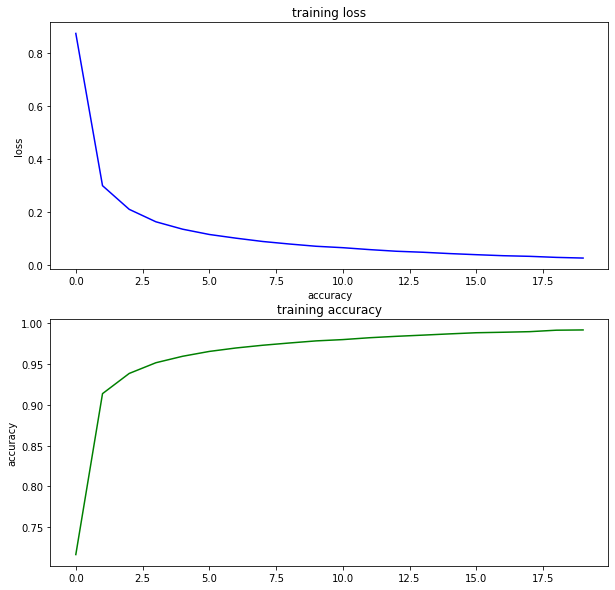

INFO:tensorflow:Assets written to: lr=0.01_bs=32_layers=[128, 64, 32, 16, 10]/assets
Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_290 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_291 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_292 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_293 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_294 (Dense)            (None, 10)                170       
Total params: 111,514
Trainable params: 111,514
Non-trainable params: 0
_________________________________________________________________


2021-11-28 21:51:55.885793: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-28 21:51:55.885830: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-28 21:51:55.885889: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-11-28 21:51:55.885908: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 1/20
  69/3750 [..............................] - ETA: 11s - loss: 2.3103 - accuracy: 0.0879

2021-11-28 21:51:56.577422: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-28 21:51:56.577453: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-28 21:51:56.577512: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-11-28 21:51:56.599836: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-11-28 21:51:56.600630: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 0 callback api events and 0 activity events. 
2021-11-28 21:51:56.601158: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-28 21:51:56.601758: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/lr=0.001_bs=16_layers=[128, 64, 32, 16, 1

3750/3750 [==============================] - 9s 2ms/step - loss: 1.9321 - accuracy: 0.4094
Epoch 2/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.8210 - accuracy: 0.7708
Epoch 3/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.4846 - accuracy: 0.8595
Epoch 4/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.3927 - accuracy: 0.8864
Epoch 5/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.3444 - accuracy: 0.9003
Epoch 6/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.3108 - accuracy: 0.9092
Epoch 7/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.2846 - accuracy: 0.9173
Epoch 8/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.2623 - accuracy: 0.9242
Epoch 9/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.2434 - accuracy: 0.9294
Epoch 10/20
3750/3750 [==============================] - 9s 2ms/step - loss: 0.2272 - accurac

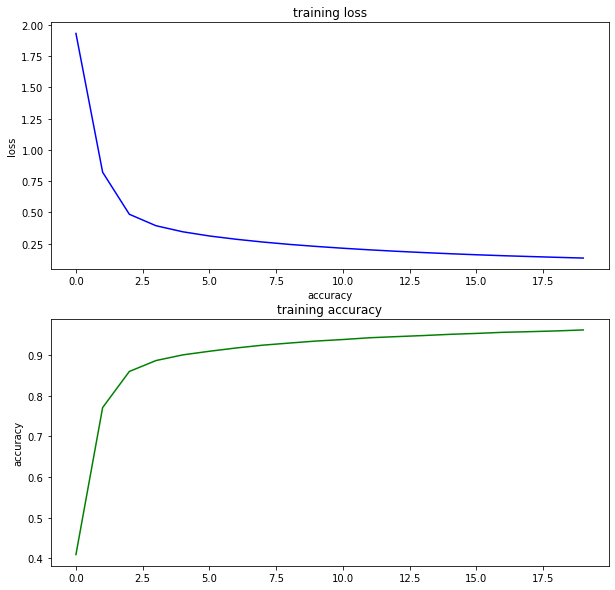

INFO:tensorflow:Assets written to: lr=0.001_bs=16_layers=[128, 64, 32, 16, 10]/assets
Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_295 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_296 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_297 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_298 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_299 (Dense)            (None, 10)                170       
Total params: 111,514
Trainable params: 111,514
Non-trainable params: 0
_________________________________________________________________


2021-11-28 21:54:54.072259: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-28 21:54:54.072299: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-28 21:54:54.072416: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-11-28 21:54:54.072611: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 1/20
  68/1875 [>.............................] - ETA: 5s - loss: 2.3017 - accuracy: 0.1379

2021-11-28 21:54:54.854594: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-28 21:54:54.854623: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-28 21:54:54.854729: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-11-28 21:54:54.872616: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-11-28 21:54:54.873234: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 0 callback api events and 0 activity events. 
2021-11-28 21:54:54.873739: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-28 21:54:54.874281: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/lr=0.001_bs=32_layers=[128, 64, 32, 16, 1

1875/1875 [==============================] - 5s 3ms/step - loss: 2.0940 - accuracy: 0.2474
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4237 - accuracy: 0.5781
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8407 - accuracy: 0.7740
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6170 - accuracy: 0.8259
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5170 - accuracy: 0.8536
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4574 - accuracy: 0.8703
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4162 - accuracy: 0.8820
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3844 - accuracy: 0.8909
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3588 - accuracy: 0.8980
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3371 - accurac

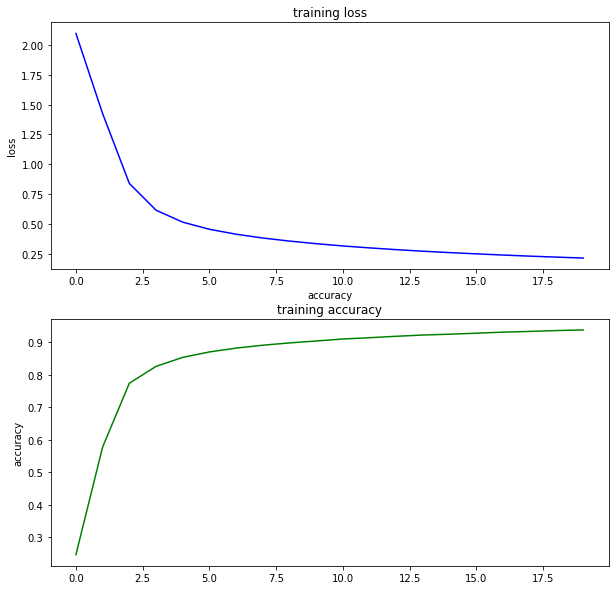

INFO:tensorflow:Assets written to: lr=0.001_bs=32_layers=[128, 64, 32, 16, 10]/assets
Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_300 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_301 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_302 (Dense)            (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


2021-11-28 21:56:26.179546: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-28 21:56:26.179582: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-28 21:56:26.179639: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-11-28 21:56:26.179672: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 1/20
 103/3750 [..............................] - ETA: 7s - loss: 2.1319 - accuracy: 0.2737

2021-11-28 21:56:26.802740: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-28 21:56:26.802768: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-28 21:56:26.802848: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-11-28 21:56:26.817336: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-11-28 21:56:26.817874: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 0 callback api events and 0 activity events. 
2021-11-28 21:56:26.818365: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-28 21:56:26.818898: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/lr=0.01_bs=16_layers=[64, 32, 10]/train/p

3750/3750 [==============================] - 7s 2ms/step - loss: 0.4975 - accuracy: 0.8619
Epoch 2/20
3750/3750 [==============================] - 7s 2ms/step - loss: 0.2428 - accuracy: 0.9295
Epoch 3/20
3750/3750 [==============================] - 7s 2ms/step - loss: 0.1921 - accuracy: 0.9447
Epoch 4/20
3750/3750 [==============================] - 7s 2ms/step - loss: 0.1600 - accuracy: 0.9538
Epoch 5/20
3750/3750 [==============================] - 7s 2ms/step - loss: 0.1377 - accuracy: 0.9597
Epoch 6/20
3750/3750 [==============================] - 7s 2ms/step - loss: 0.1204 - accuracy: 0.9650
Epoch 7/20
3750/3750 [==============================] - 7s 2ms/step - loss: 0.1078 - accuracy: 0.9681
Epoch 8/20
3750/3750 [==============================] - 7s 2ms/step - loss: 0.0966 - accuracy: 0.9719
Epoch 9/20
3750/3750 [==============================] - 7s 2ms/step - loss: 0.0883 - accuracy: 0.9742
Epoch 10/20
3750/3750 [==============================] - 7s 2ms/step - loss: 0.0803 - accurac

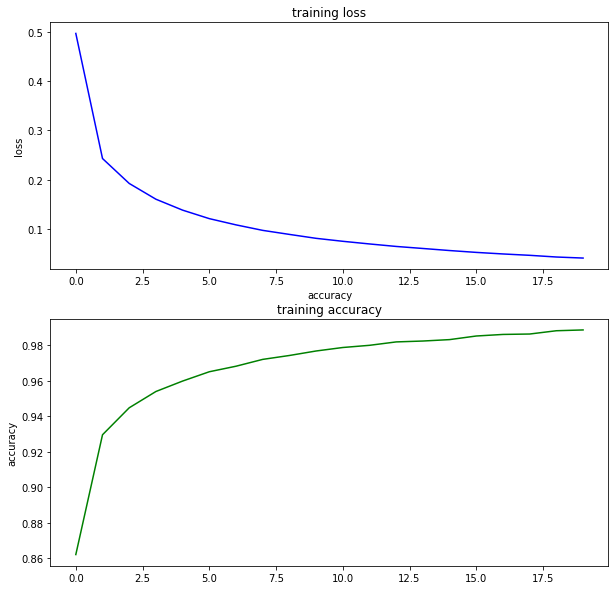

INFO:tensorflow:Assets written to: lr=0.01_bs=16_layers=[64, 32, 10]/assets
Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_303 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_304 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_305 (Dense)            (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


2021-11-28 21:58:49.876315: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-28 21:58:49.876350: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-28 21:58:49.876404: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-11-28 21:58:49.876440: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 1/20
  94/1875 [>.............................] - ETA: 3s - loss: 2.1282 - accuracy: 0.2793

2021-11-28 21:58:50.547200: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-28 21:58:50.547237: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-28 21:58:50.547354: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-11-28 21:58:50.563767: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-11-28 21:58:50.564540: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 0 callback api events and 0 activity events. 
2021-11-28 21:58:50.565090: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-28 21:58:50.565677: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/lr=0.01_bs=32_layers=[64, 32, 10]/train/p

1875/1875 [==============================] - 4s 2ms/step - loss: 0.6791 - accuracy: 0.8107
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3157 - accuracy: 0.9088
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2610 - accuracy: 0.9248
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2264 - accuracy: 0.9348
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2007 - accuracy: 0.9420
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1805 - accuracy: 0.9479
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1651 - accuracy: 0.9529
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1515 - accuracy: 0.9564
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1409 - accuracy: 0.9595
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1316 - accurac

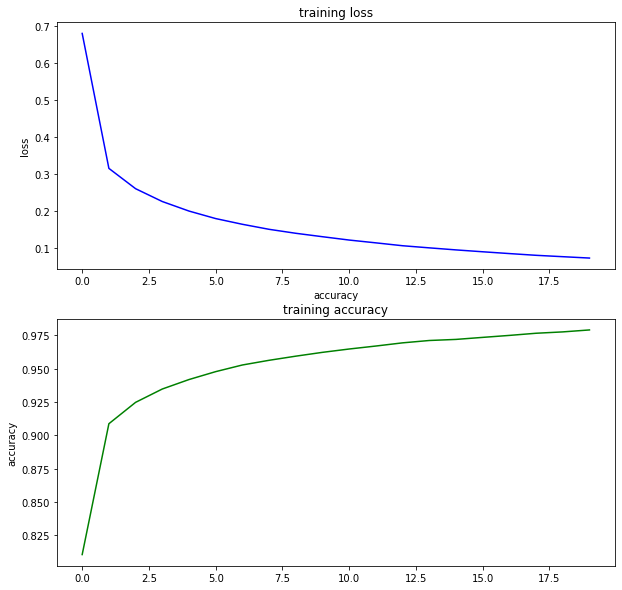

INFO:tensorflow:Assets written to: lr=0.01_bs=32_layers=[64, 32, 10]/assets
Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_306 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_307 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_308 (Dense)            (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


2021-11-28 22:00:05.179197: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-28 22:00:05.179230: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-28 22:00:05.179287: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-11-28 22:00:05.179384: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 1/20
  87/3750 [..............................] - ETA: 8s - loss: 2.3646 - accuracy: 0.0747

2021-11-28 22:00:05.831215: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-28 22:00:05.831250: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-28 22:00:05.831326: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-11-28 22:00:05.852450: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-11-28 22:00:05.853034: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 0 callback api events and 0 activity events. 
2021-11-28 22:00:05.853539: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-28 22:00:05.854094: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/lr=0.001_bs=16_layers=[64, 32, 10]/train/

3750/3750 [==============================] - 8s 2ms/step - loss: 1.5268 - accuracy: 0.5637
Epoch 2/20
3750/3750 [==============================] - 7s 2ms/step - loss: 0.6329 - accuracy: 0.8357
Epoch 3/20
3750/3750 [==============================] - 7s 2ms/step - loss: 0.4616 - accuracy: 0.8745
Epoch 4/20
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3947 - accuracy: 0.8894
Epoch 5/20
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3580 - accuracy: 0.8987
Epoch 6/20
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3333 - accuracy: 0.9050
Epoch 7/20
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3146 - accuracy: 0.9095
Epoch 8/20
3750/3750 [==============================] - 7s 2ms/step - loss: 0.2998 - accuracy: 0.9137
Epoch 9/20
3750/3750 [==============================] - 7s 2ms/step - loss: 0.2873 - accuracy: 0.9173
Epoch 10/20
3750/3750 [==============================] - 7s 2ms/step - loss: 0.2765 - accurac

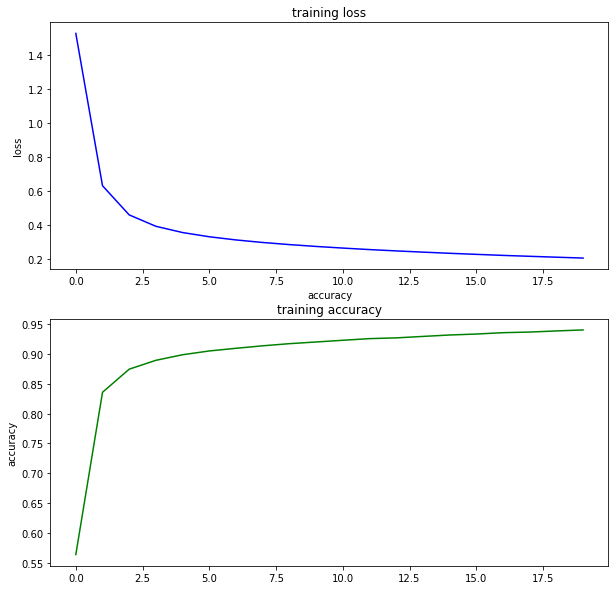

INFO:tensorflow:Assets written to: lr=0.001_bs=16_layers=[64, 32, 10]/assets
Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_309 (Dense)            (None, 64)                50240     
_________________________________________________________________
dense_310 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_311 (Dense)            (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


2021-11-28 22:02:32.468376: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-28 22:02:32.468403: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-28 22:02:32.468476: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-11-28 22:02:32.468519: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 1/20
  86/1875 [>.............................] - ETA: 4s - loss: 2.3445 - accuracy: 0.1086

2021-11-28 22:02:33.113915: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-28 22:02:33.113942: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-28 22:02:33.113996: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-11-28 22:02:33.132228: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-11-28 22:02:33.132756: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 0 callback api events and 0 activity events. 
2021-11-28 22:02:33.133229: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-28 22:02:33.133826: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/lr=0.001_bs=32_layers=[64, 32, 10]/train/

1875/1875 [==============================] - 4s 2ms/step - loss: 1.9725 - accuracy: 0.3690
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1386 - accuracy: 0.7242
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7270 - accuracy: 0.8180
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5714 - accuracy: 0.8528
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4904 - accuracy: 0.8702
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4410 - accuracy: 0.8809
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4081 - accuracy: 0.8886
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3844 - accuracy: 0.8941
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3662 - accuracy: 0.8982
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3517 - accurac

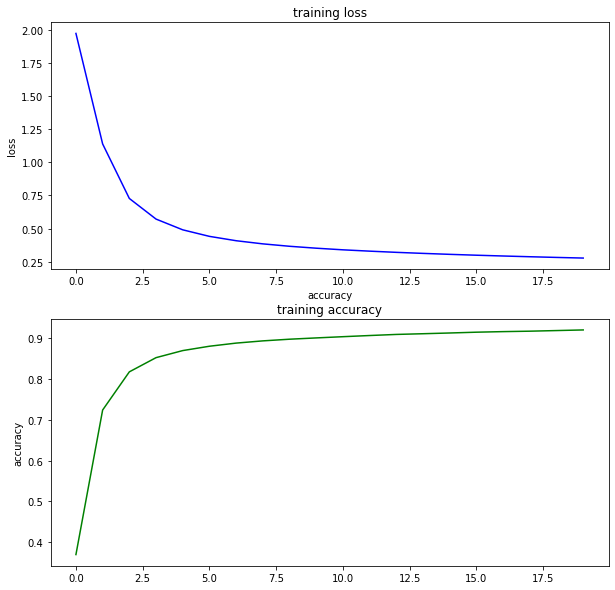

INFO:tensorflow:Assets written to: lr=0.001_bs=32_layers=[64, 32, 10]/assets
Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_312 (Dense)            (None, 18)                14130     
_________________________________________________________________
dense_313 (Dense)            (None, 10)                190       
Total params: 14,320
Trainable params: 14,320
Non-trainable params: 0
_________________________________________________________________


2021-11-28 22:03:47.635539: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-28 22:03:47.635575: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-28 22:03:47.635653: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-11-28 22:03:47.635731: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 1/20
  98/3750 [..............................] - ETA: 7s - loss: 2.1154 - accuracy: 0.2672  

2021-11-28 22:03:48.245198: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-28 22:03:48.245233: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-28 22:03:48.245357: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-11-28 22:03:48.257613: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-11-28 22:03:48.258120: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 0 callback api events and 0 activity events. 
2021-11-28 22:03:48.258612: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-28 22:03:48.259216: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/lr=0.01_bs=16_layers=[18, 10]/train/plugi

3750/3750 [==============================] - 7s 2ms/step - loss: 0.5703 - accuracy: 0.8487
Epoch 2/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.3160 - accuracy: 0.9102
Epoch 3/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.2789 - accuracy: 0.9205
Epoch 4/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.2541 - accuracy: 0.9281
Epoch 5/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.2332 - accuracy: 0.9341
Epoch 6/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.2175 - accuracy: 0.9385
Epoch 7/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.2049 - accuracy: 0.9423
Epoch 8/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.1955 - accuracy: 0.9448
Epoch 9/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.1870 - accuracy: 0.9473
Epoch 10/20
3750/3750 [==============================] - 6s 2ms/step - loss: 0.1801 - accurac

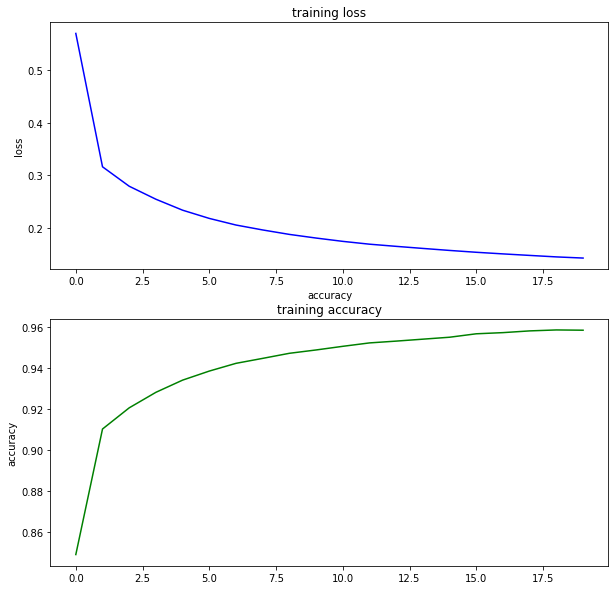

INFO:tensorflow:Assets written to: lr=0.01_bs=16_layers=[18, 10]/assets
Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_314 (Dense)            (None, 18)                14130     
_________________________________________________________________
dense_315 (Dense)            (None, 10)                190       
Total params: 14,320
Trainable params: 14,320
Non-trainable params: 0
_________________________________________________________________


2021-11-28 22:05:57.989243: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-28 22:05:57.989275: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-28 22:05:57.989325: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-11-28 22:05:57.989358: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 1/20
 102/1875 [>.............................] - ETA: 3s - loss: 2.1275 - accuracy: 0.2258

2021-11-28 22:05:58.604347: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-28 22:05:58.604377: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-28 22:05:58.604512: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-11-28 22:05:58.616368: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-11-28 22:05:58.616847: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 0 callback api events and 0 activity events. 
2021-11-28 22:05:58.617310: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-28 22:05:58.617869: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/lr=0.01_bs=32_layers=[18, 10]/train/plugi

1875/1875 [==============================] - 4s 2ms/step - loss: 0.7705 - accuracy: 0.7916
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3741 - accuracy: 0.8948
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3243 - accuracy: 0.9079
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2990 - accuracy: 0.9149
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2823 - accuracy: 0.9199
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2699 - accuracy: 0.9229
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2591 - accuracy: 0.9266
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2498 - accuracy: 0.9294
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2419 - accuracy: 0.9323
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2346 - accurac

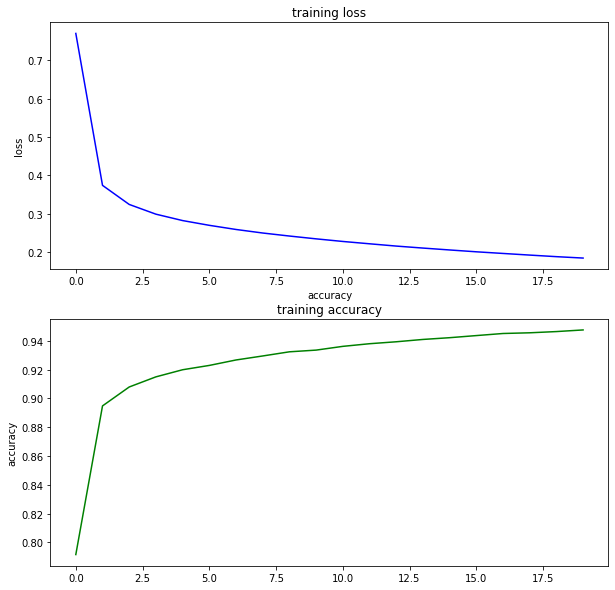

INFO:tensorflow:Assets written to: lr=0.01_bs=32_layers=[18, 10]/assets
Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_316 (Dense)            (None, 18)                14130     
_________________________________________________________________
dense_317 (Dense)            (None, 10)                190       
Total params: 14,320
Trainable params: 14,320
Non-trainable params: 0
_________________________________________________________________


2021-11-28 22:07:06.999896: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-28 22:07:06.999931: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-28 22:07:07.000035: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-11-28 22:07:07.000317: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 1/20
  99/3750 [..............................] - ETA: 7s - loss: 2.3017 - accuracy: 0.1080  

2021-11-28 22:07:07.653424: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-28 22:07:07.653456: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-28 22:07:07.653525: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-11-28 22:07:07.674394: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-11-28 22:07:07.674892: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 0 callback api events and 0 activity events. 
2021-11-28 22:07:07.675394: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-28 22:07:07.676050: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/lr=0.001_bs=16_layers=[18, 10]/train/plug

3750/3750 [==============================] - 7s 2ms/step - loss: 1.5940 - accuracy: 0.5244
Epoch 2/20
3750/3750 [==============================] - 7s 2ms/step - loss: 0.7626 - accuracy: 0.8245
Epoch 3/20
3750/3750 [==============================] - 7s 2ms/step - loss: 0.5551 - accuracy: 0.8611
Epoch 4/20
3750/3750 [==============================] - 7s 2ms/step - loss: 0.4717 - accuracy: 0.8756
Epoch 5/20
3750/3750 [==============================] - 7s 2ms/step - loss: 0.4264 - accuracy: 0.8842
Epoch 6/20
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3977 - accuracy: 0.8909
Epoch 7/20
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3775 - accuracy: 0.8948
Epoch 8/20
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3623 - accuracy: 0.8983
Epoch 9/20
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3505 - accuracy: 0.9014
Epoch 10/20
3750/3750 [==============================] - 7s 2ms/step - loss: 0.3407 - accurac

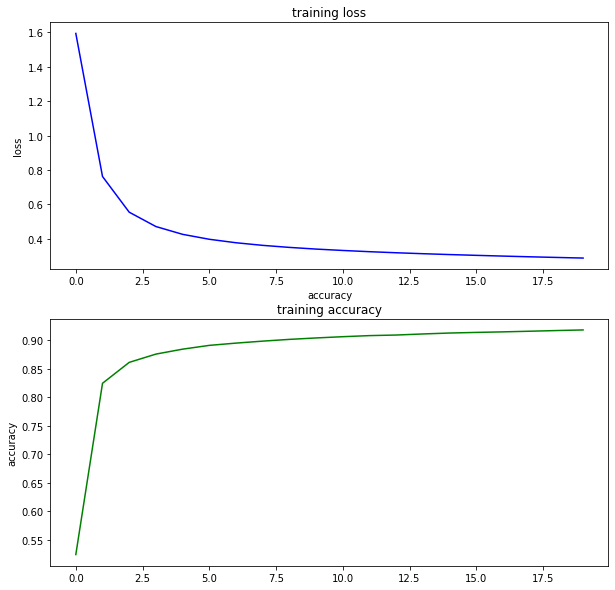

INFO:tensorflow:Assets written to: lr=0.001_bs=16_layers=[18, 10]/assets
Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_318 (Dense)            (None, 18)                14130     
_________________________________________________________________
dense_319 (Dense)            (None, 10)                190       
Total params: 14,320
Trainable params: 14,320
Non-trainable params: 0
_________________________________________________________________


2021-11-28 22:09:20.458381: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-28 22:09:20.458412: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-28 22:09:20.458463: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-11-28 22:09:20.458526: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


Epoch 1/20
  97/1875 [>.............................] - ETA: 3s - loss: 2.3172 - accuracy: 0.1147

2021-11-28 22:09:21.090479: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-28 22:09:21.090506: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-28 22:09:21.090559: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1666] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2021-11-28 22:09:21.109762: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-11-28 22:09:21.110268: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 0 callback api events and 0 activity events. 
2021-11-28 22:09:21.110770: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-28 22:09:21.111383: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/lr=0.001_bs=32_layers=[18, 10]/train/plug

1875/1875 [==============================] - 4s 2ms/step - loss: 1.9224 - accuracy: 0.4080
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2231 - accuracy: 0.7303
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8560 - accuracy: 0.7986
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6902 - accuracy: 0.8272
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5986 - accuracy: 0.8446
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5401 - accuracy: 0.8566
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4993 - accuracy: 0.8656: 0s - loss: 0.5006 - ac
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4693 - accuracy: 0.8728
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4464 - accuracy: 0.8777
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step 

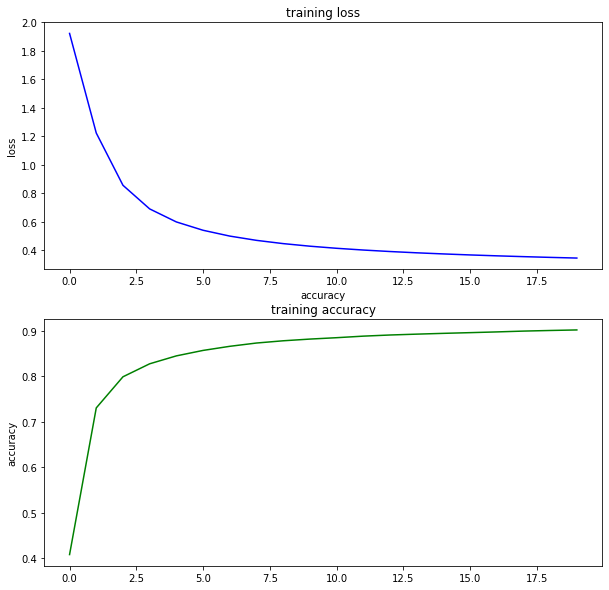

INFO:tensorflow:Assets written to: lr=0.001_bs=32_layers=[18, 10]/assets


In [46]:
lr = [0.01, 0.001] 
batch_size = [16,32] 
layers = [
    [128, 64, 32, 16, 10], 
    [64, 32, 10],  
    [18, 10]
]

epochs = 20

for layer in layers: 
    for learning_rate in lr: 
        for bs in batch_size: 
            
            sequence = [tf.keras.Input(shape=input_shape)]
            
            sequence.extend([tf.keras.layers.Dense(unit, activation="relu") if i!=len(layer)-1 \
                 else tf.keras.layers.Dense(unit, activation="softmax") for i,unit in enumerate(layer)])
            
            my_dnn = tf.keras.Sequential(sequence)
            my_dnn.summary()
            
            optimizer = tf.keras.optimizers.SGD(
                learning_rate=learning_rate # hyper parameters
            )
            
            
            my_dnn.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

        
            # A callback is an object that can perform actions at various stages of training
            log_dir = "logs/fit/" + f"lr={learning_rate}_bs={bs}_layers={layer}"
            tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
            
            
            
            
            history = my_dnn.fit(    
                x=x_train,
                y=y_train,
                batch_size=bs, # hyper parameters
                epochs=epochs, # hyper parameters
                callbacks=[tensorboard_callback]
            )
            
            print(f"plotting for model with : {(learning_rate, bs, layer)}")
            plot_results(history)
            
            # save the model
            my_dnn.save(f"lr={learning_rate}_bs={bs}_layers={layer}")